In [3]:
import pylab as plt
import numpy as np
import swot_ssh_utils as swot
from cartopy import crs as ccrs
from netCDF4 import Dataset
import xarray as xr
import sys as sys

plt.rcParams.update({'font.size': 18,'savefig.facecolor':'white'})

In [11]:
# Exemple of file read with E(f) data 
# NB this file is also at: 
# https://data-ww3.ifremer.fr/PROJECT/SWOT/GLOBAL/work2023-01-01T00_2023-07-01T00/FIELD_NC/GLOB-30M/SWOT_WW3-GLOB-30M_202306_ef.nc
mypath1='/media/ardhuin/FabLinux/WW3-SWOT/GLOBAL_NOREF/'
mypath2='/media/ardhuin/FabLinux/WW3-SWOT/GLOBAL_REF102040/'
fileef1=mypath1+'SWOT_WW3-GLOB-30M_202306_ef.nc'
fileef2=mypath2+'SWOT_WW3-GLOB-30M_202306_ef.nc'
ds_ww3 = xr.open_dataset(fileef1)
# Selects time step 45 and frequency 3 and convert to m^2/Hz 
it=45
Ef2D = 10**(ds_ww3.ef[it,3,:,:])-1E-12
f=ds_ww3.f
df=f*(1.1-1/1.1)*0.5
nf=np.size(f)
nf
Etot=Ef2D*0
# exemple use of Ef to recompute Hs (NB: you can restrict the freq. range to have a "partial Hs")
for ind in range(nf):
  #print(ind,f[ind])
  E2D=ds_ww3.ef[it,ind,:,:]
  Ef = 10**(E2D)-1E-12
  Etot = Etot + Ef*df[ind]
Hs = 4*np.sqrt(Etot)
print('Hs max for June 2023:',np.nanmax(Hs))

Hs max: 17.248497


Hs max: 17.248497


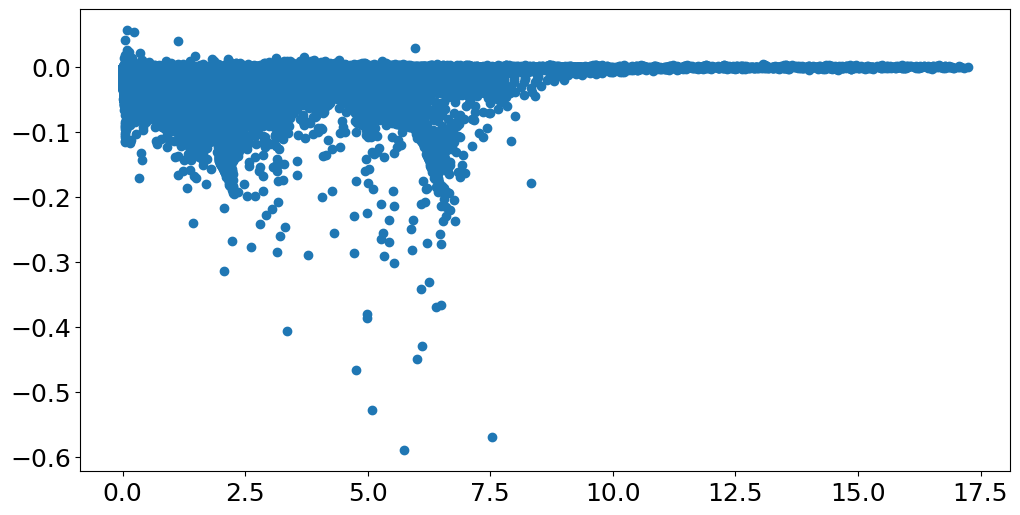

In [12]:
# Exemple of file read with E(f) data 
# NB this file is also at: 
# https://data-ww3.ifremer.fr/PROJECT/SWOT/GLOBAL/work2023-01-01T00_2023-07-01T00/FIELD_NC/GLOB-30M/SWOT_WW3-GLOB-30M_202306_ef.nc
mypath1='/media/ardhuin/FabLinux/WW3-SWOT/GLOBAL/'
mypath2='/media/ardhuin/FabLinux/WW3-SWOT/GLOBAL_REF102040/'
fileef1=mypath1+'SWOT_WW3-GLOB-30M_202306_ef.nc'
fileef2=mypath2+'SWOT_WW3-GLOB-30M_202306_ef.nc'
ds_ww3 = xr.open_dataset(fileef2)
# Selects time step 45 and frequency 3 and convert to m^2/Hz 
it=45
Ef2D = 10**(ds_ww3.ef[it,3,:,:])-1E-12
f=ds_ww3.f
df=f*(1.1-1/1.1)*0.5
nf=np.size(f)
nf
Etot=Ef2D*0
# exemple use of Ef to recompute Hs (NB: you can restrict the freq. range to have a "partial Hs")
for ind in range(nf):
  #print(ind,f[ind])
  E2D=ds_ww3.ef[it,ind,:,:]
  Ef = 10**(E2D)-1E-12
  Etot = Etot + Ef*df[ind]
Hs2 = 4*np.sqrt(Etot)
print('Hs max:',np.nanmax(Hs))

plt.figure(figsize=(12,6))
plt.scatter(Hs,(Hs-Hs2))


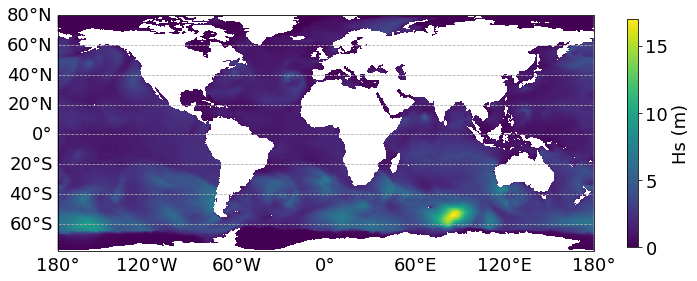

In [28]:

plt.figure(figsize=(12,6))

ax = plt.axes(projection=ccrs.PlateCarree()) 
plt.pcolormesh(ds_ww3.longitude, ds_ww3.latitude  , Hs, shading ='auto',vmin = 0, vmax =17,rasterized=True)
plt.colorbar(shrink = 0.7, label ="Hs (m)")
gl = ax.gridlines(linestyle="--")
gl.bottom_labels = True
gl.top_labels= False
gl.left_labels= True
gl.right_labels=False
gl.xlines = False

plt.show()

<xarray.DataArray 'f' ()>
array(22.16267733)
Coordinates:
    f        float32 0.04512


/home/ardhuin/anaconda3/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


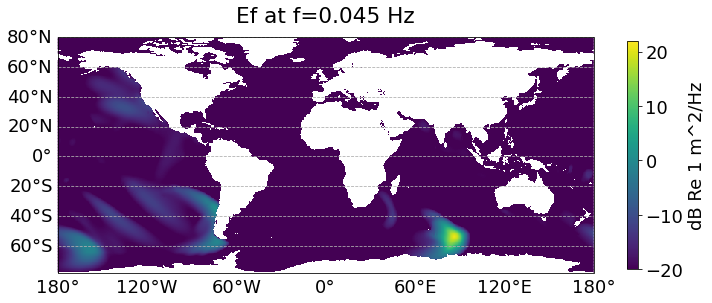

In [41]:
plt.figure(figsize=(12,6))
print(1./f[3])
ax = plt.axes(projection=ccrs.PlateCarree()) 
plt.pcolormesh(ds_ww3.longitude, ds_ww3.latitude  , 10*np.log10(Ef2D), shading ='auto',vmin = -20, vmax =22,rasterized=True)
plt.title('E(f) at f=0.045 Hz')
plt.colorbar(shrink = 0.7, label ='dB Re 1 m^2/Hz')
gl = ax.gridlines(linestyle="--")
gl.bottom_labels = True
gl.top_labels= False
gl.left_labels= True
gl.right_labels=False
gl.xlines = False

plt.show()

/home/ardhuin/anaconda3/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


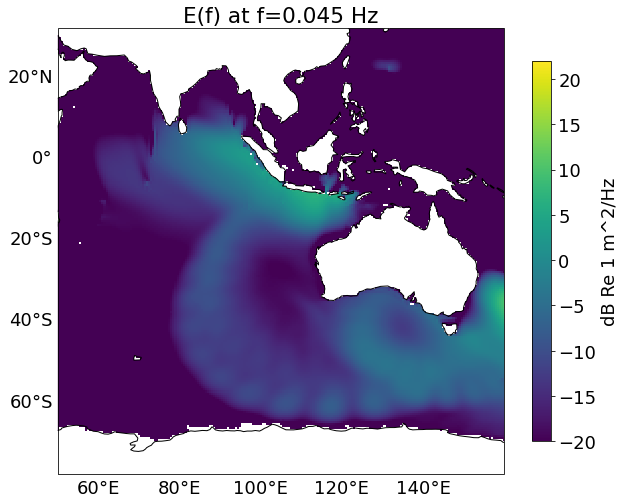

In [44]:
# now look at the swell and reflection a little later  .. 
it=78
Ef2D = 10**(ds_ww3.ef[it,3,:,:])-1E-12



plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.PlateCarree(), extent= [50, 160, -70, 20]) 

plt.pcolormesh(ds_ww3.longitude, ds_ww3.latitude  , 10*np.log10(Ef2D), shading ='auto',vmin = -20, vmax =22,rasterized=True)
plt.title('E(f) at f=0.045 Hz')
plt.colorbar(shrink = 0.7, label ='dB Re 1 m^2/Hz')
gl = ax.gridlines(draw_labels=True, linestyle="--", alpha = 0)
ax.coastlines()

gl.bottom_labels = True
gl.top_labels= False
gl.left_labels= True
gl.right_labels=False
gl.xlines = False

plt.show()